# PROJECT 1 - COLOR COMPRESSION 
### NGUYỄN QUỐC HUY - 21127511

## Import libary

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

## Find closest centroids for each pixel

In [2]:
def find_closest_centroids(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

## Calculate centroids after each update

In [3]:
def calculate_centroids(X, labels, k_clusters):
    centroids = np.array([np.mean(X[labels == i], axis=0) if np.any(labels == i) else np.zeros(X.shape[1]) for i in range(k_clusters)])
    return centroids

## Kmeans function

In [4]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    centroid_history = []
    centroids = init_centroids
    for _ in range(max_iter):
        centroid_history.append(centroids)
        labels = find_closest_centroids(img_1d, centroids)
        centroids = calculate_centroids(img_1d, labels, k_clusters)
        if np.allclose(centroid_history[-1], centroids, atol= 0.1):
            print("Iter (number of repeat time):", _ + 1)
            return labels, centroid_history
    return labels, centroid_history


## Random Initialization functions

In [5]:
def choose_in_pixels_centroids(X, k_clusters):
    random_indices = np.random.choice(range(X.shape[0]), size=k_clusters, replace=False)
    return X[random_indices]

In [6]:
def choose_random_centroids(X, k_clusters):
    centroids = np.random.randint(0, 256, size=(k_clusters, X.shape[1]))
    return centroids

## Some other feature functions

In [7]:
def input_information():
    image_file = input("Input image file: ")
    
    # Kiểm tra và xử lý k_clusters
    k_clusters = input("Input k clusters: ")
    if not k_clusters.isdigit():
        print("Invalid input for k clusters. Setting default value to 3.")
        k_clusters = 3
    else:
        k_clusters = int(k_clusters)
    
    # Kiểm tra và xử lý max_iter
    max_iter = input("Input max iterator: ")
    if not max_iter.isdigit():
        print("Invalid input for max iterator. Setting default value to 300.")
        max_iter = 300
    else:
        max_iter = int(max_iter)
    
    init_centroids = input("Input init centroids type (random/in_pixels): ")
    if init_centroids != "random" and init_centroids != "in_pixels":
        print("Invalid input for init centroids. Setting default value to random.")
        init_centroids = "random"
    
    output_format = input("Input the output image extension (pdf/png): ")
    if output_format != "pdf" and output_format != "png":
        print("Invalid input for output image extension. Setting default value to png.")
        output_format = "png"
    
    return image_file, k_clusters, max_iter, init_centroids, output_format


In [8]:
def print_image_information(image_file):
    try:
        # Đọc hình ảnh
        image = Image.open(image_file)

        # Lấy thông tin hình ảnh
        image_shape = image.size
        image_width, image_height = image.size
        num_channels = len(image.getbands())
        image_dtype = image.mode
        image_size = image_height* image_width

        # In thông tin hình ảnh
        print("ORIGINAL IMAGE INFORMATION")
        print("Image shape:", image_shape)
        # print("Image size: ", image_size, " bytes")
        print("Image width:", image_width, " pixels")
        print("Image height:", image_height, " pixels")
        print("Image dimension:", num_channels)
        print("Image type:", image_dtype)
    except IOError:
        print("Can not read image")

In [9]:
def image_handler(image_file, k_clusters, max_iter = 300, init_centroids = 'random'):
# Đọc ảnh và chuyển thành mảng numpy
    image = Image.open(image_file)
    image_np = np.array(image)

    # Chuyển đổi ảnh thành 1D array
    img_1d = image_np.reshape(-1, 3) / 255  # Reshape và chuẩn hóa giá trị [0, 1]

    # Thực hiện K-Means
    if init_centroids == 'random':
        initial_centroids = choose_random_centroids(img_1d, k_clusters)
    if init_centroids == 'in_pixels':
        initial_centroids = choose_in_pixels_centroids(img_1d, k_clusters)
    start_time = time.time()
    labels, centroid_history = kmeans(img_1d, k_clusters, max_iter, initial_centroids)
    end_time = time.time()
    # Tạo ảnh mới từ các centroid và nhãn
    final_centroids = centroid_history[-1]
    final_image = final_centroids[labels].reshape(image_np.shape)

    # Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title("Original Image")
    axs[0].imshow(image_np)
    axs[0].axis('off')
    axs[1].set_title(f"Reduced Image (k={k_clusters}, iter={max_iter}, init={init_centroids})")
    axs[1].imshow(final_image)
    axs[1].axis('off')
    plt.show()
    print("Run time: ", end_time - start_time)
    print("Final centroid: ", final_centroids * 255)
    print("Centroid_history: ", centroid_history)
    print("Labels: ", labels)
    return final_image

In [10]:
def save_image(final_image, output_format = "output.png"):
    # Lưu ảnh đầu ra
    if output_format == "png":
        output_file = "output.png"
    elif output_format == "pdf":
        output_file = "output.pdf"
    Image.fromarray((final_image * 255).astype(np.uint8)).save(output_file)
    
    print("Save output image successfully!")


## General Program 

In [11]:
def main():
    image_file, k_clusters, max_iter, init_centroids, output_format = input_information()
    print_image_information(image_file)
    final_image = image_handler(image_file, k_clusters, max_iter, init_centroids)
    save_image(final_image, output_format)

## Simplicity
Run all the first time then the program will run by just click run the last cell

ORIGINAL IMAGE INFORMATION
Image shape: (800, 454)
Image width: 800  pixels
Image height: 454  pixels
Image dimension: 3
Image type: RGB
Iter (number of repeat time): 1


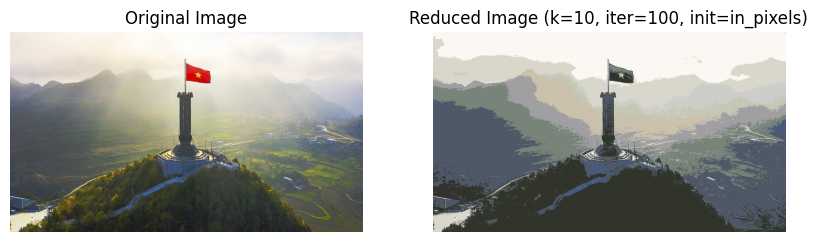

Run time:  0.4977297782897949
Final centroid:  [[160. 160. 162.]
 [196. 201. 181.]
 [217. 215. 203.]
 [205. 206. 201.]
 [251. 248. 243.]
 [ 68.  91. 133.]
 [ 79.  88. 103.]
 [120. 132. 122.]
 [202. 194. 173.]
 [ 49.  52.  43.]]
Centroid_history:  [array([[0.62745098, 0.62745098, 0.63529412],
       [0.76862745, 0.78823529, 0.70980392],
       [0.85098039, 0.84313725, 0.79607843],
       [0.80392157, 0.80784314, 0.78823529],
       [0.98431373, 0.97254902, 0.95294118],
       [0.26666667, 0.35686275, 0.52156863],
       [0.30980392, 0.34509804, 0.40392157],
       [0.47058824, 0.51764706, 0.47843137],
       [0.79215686, 0.76078431, 0.67843137],
       [0.19215686, 0.20392157, 0.16862745]])]
Labels:  [4 4 4 ... 6 6 6]
Save output image successfully!


In [12]:
if __name__ == "__main__":
    main()